In [15]:
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings as filt 

filt('ignore')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (12, 6)

In [46]:
dfname = 'customer_churn_large_dataset.xlsx'
print(f'Total rows : {pd.read_excel(dfname).shape[0]}')

Total rows : 100000


#### Sample data review

> using half rows to lesser the memory usage and increase the speed of results

In [53]:
nrows = 50000
df = pd.read_excel(dfname, nrows = nrows)
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [10]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

##### we don't have any null values, so moving on to next part 

In [11]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,44.038260,12.471100,65.064152,274.473020,0.499000
std,14433.901067,15.254933,6.930533,20.254740,130.533092,0.500004
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,12500.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,25000.500000,44.000000,12.000000,65.030000,274.000000,0.000000
75%,37500.250000,57.000000,18.000000,82.710000,387.000000,1.000000
max,50000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [94]:
def encode_(values, return_obj = False):
    Encoder = LabelEncoder()
    values = Encoder.fit_transform(values)
    if return_obj:
        return values, Encoder
    return values

def plot_pie(x, nrows):
    values = x.value_counts().values
    labels = x.value_counts().index
    explode = [0] * len(labels)
    explode[np.argmax(values)] = .1
    _,_, apct = plt.pie(values, labels = labels, explode = explode, autopct = '%1.1f%%')
    for a in apct:
        a.set_color('black')

##### So, what makes customer churn ? 
> it can be based on multiple factors like poor product or service quality, high pricing, ineffective marketing, or better offers from competitors.

> Now, lets try to visualize if we can figure out why.

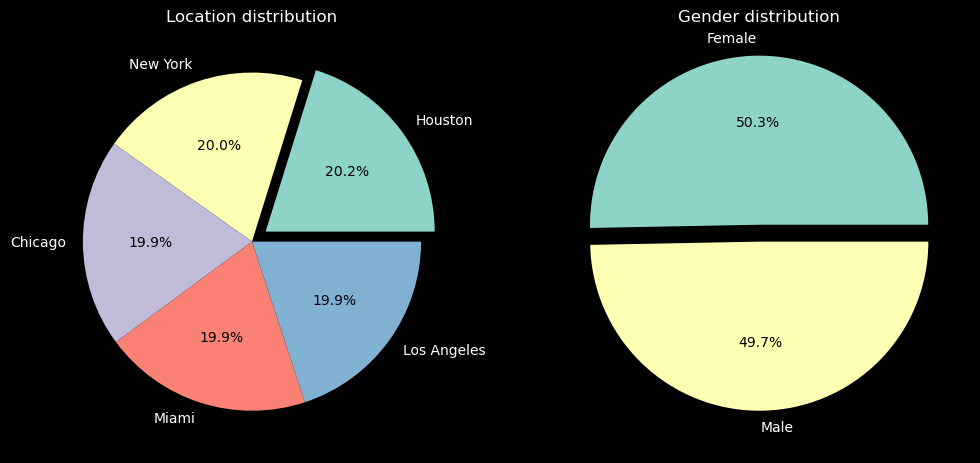

In [95]:
plt.subplot(1, 2, 1)
plt.title('Location distribution')
plot_pie(df.Location, nrows)

plt.subplot(1, 2, 2)
plt.title('Gender distribution')
plot_pie(df.Gender, nrows)

#### Now let's see the gender distribution based on location 

In [84]:
def get_rows(n, col):
    if n % col == 0:
        return n // col
    return (n // col) + 1

def group_pie_plot(df, groupby, x, n, c = 5, total_rows = nrows):
    r = get_rows(n, c)
    plt.tight_layout()
    iterr = 1
    for row, rdf in df.groupby(groupby):
        plt.subplot(r, c, iterr)
        plt.title(row)
        plot_pie(rdf[x], rdf.shape[0])
        iterr += 1

##### Gender distribution based on locations

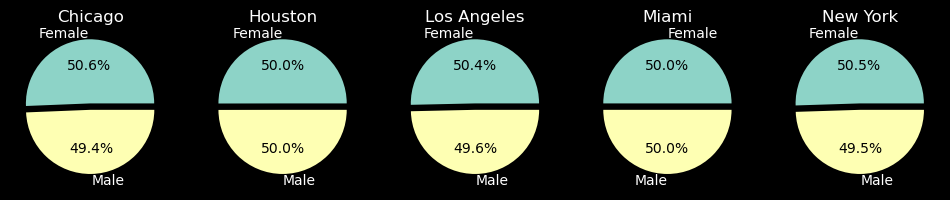

In [96]:
groupby = 'Location'
x       = 'Gender'
n       = df[groupby].unique().shape[0]
group_pie_plot(df, groupby, x, n)

##### Churn distribution based on locations

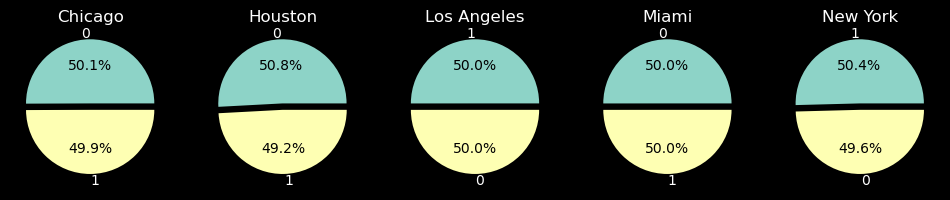

In [86]:
groupby = 'Location'
x       = 'Churn'
n       = df[groupby].unique().shape[0]
group_pie_plot(df, groupby, x, n)

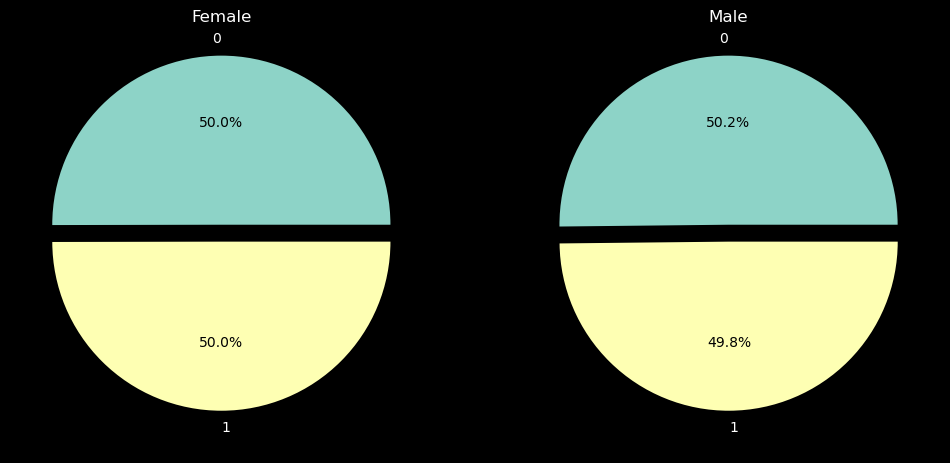

In [87]:
groupby = 'Gender'
x       = 'Churn'
n       = df[groupby].unique().shape[0]
group_pie_plot(df, groupby, x, n, c = 2)

##### Based on this sample data everything seems to be equally distributed

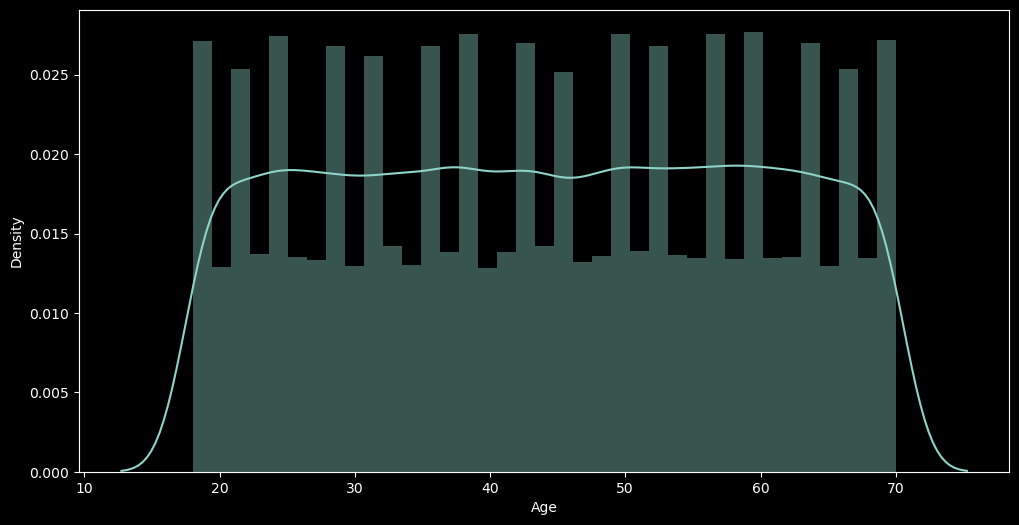

In [73]:
sns.distplot(df.Age);

##### let's group the ages based on stages from our df  |  [source](https://integrisok.com/resources/on-your-health/2015/october/stages-of-life-health-for-every-age)
> **Teens** : 18 & 19

> **Adults** : 20 - 39

> **Middle Age Adults** : 40 - 59

> **Senior Adults** : 60+

In [75]:
def age_feature(x):
    stages = ['Teens', 'Adults', 'Middle Age Adults', 'Senior Adults']
    if x >= 12 and x <= 19:
        return 'Teens'
    elif x >= 20 and x <= 39:
        return 'Adults'
    elif x >= 40 and x <= 59:
        return 'Middle Age Adults'
    elif x >= 60:
        return 'Senior Adults'

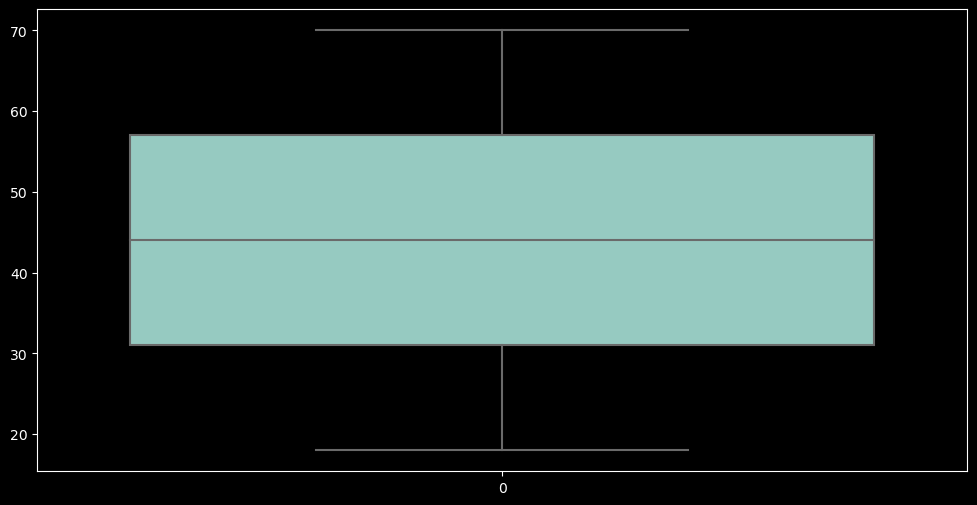

In [79]:
sns.boxplot(df.Age);

##### Now lets see Churn distribution based on age stage

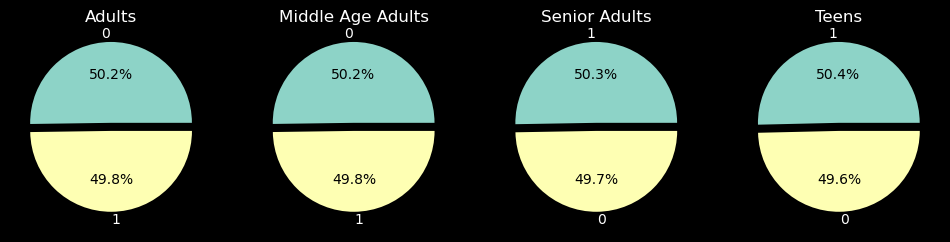

In [88]:
df['Age_group'] = df.Age.apply(age_feature)
groupby = 'Age_group'
x = 'Churn' 
n = df[groupby].unique().shape[0]
group_pie_plot(df, groupby, x, n, n)

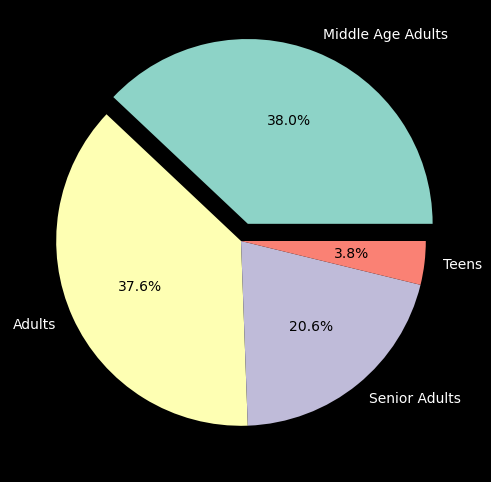

In [108]:
plot_pie(df.Age_group, nrows)

In [97]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_group
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,Senior Adults
1,2,Customer_2,62,Female,New York,1,48.76,172,0,Senior Adults
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,Adults
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,Adults
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,Middle Age Adults


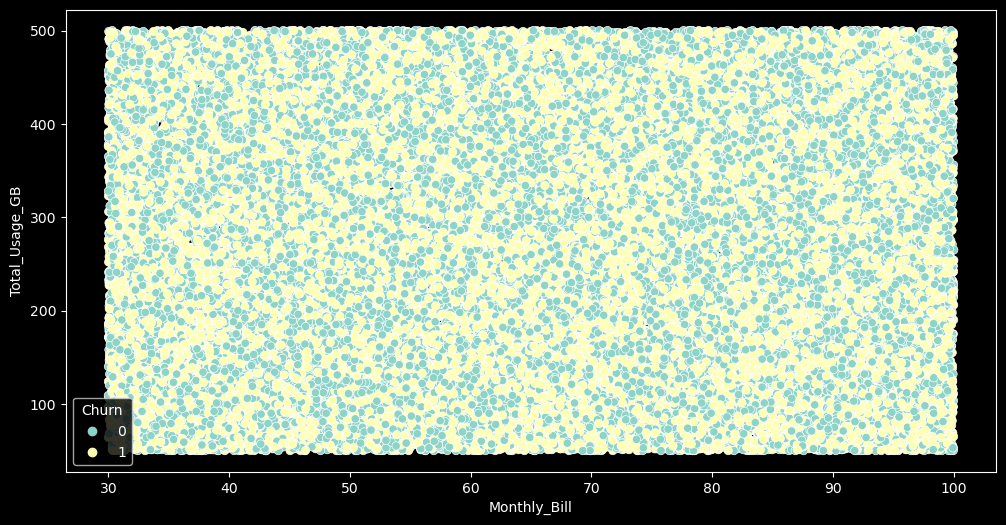

In [106]:
sns.scatterplot(data = df, x = 'Monthly_Bill', y = 'Total_Usage_GB', hue = 'Churn');

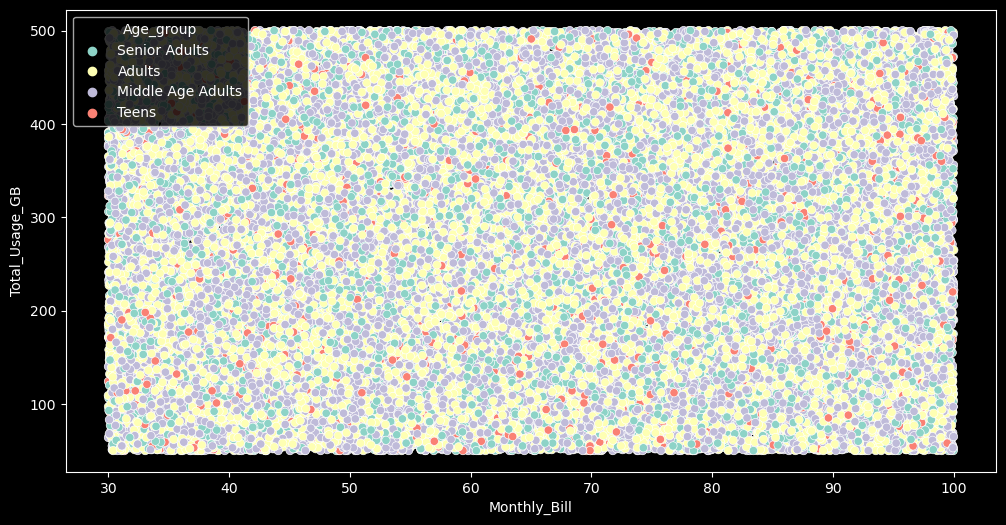

In [107]:
sns.scatterplot(data = df, x = 'Monthly_Bill', y = 'Total_Usage_GB', hue = 'Age_group');

<Axes: xlabel='Subscription_Length_Months', ylabel='Density'>

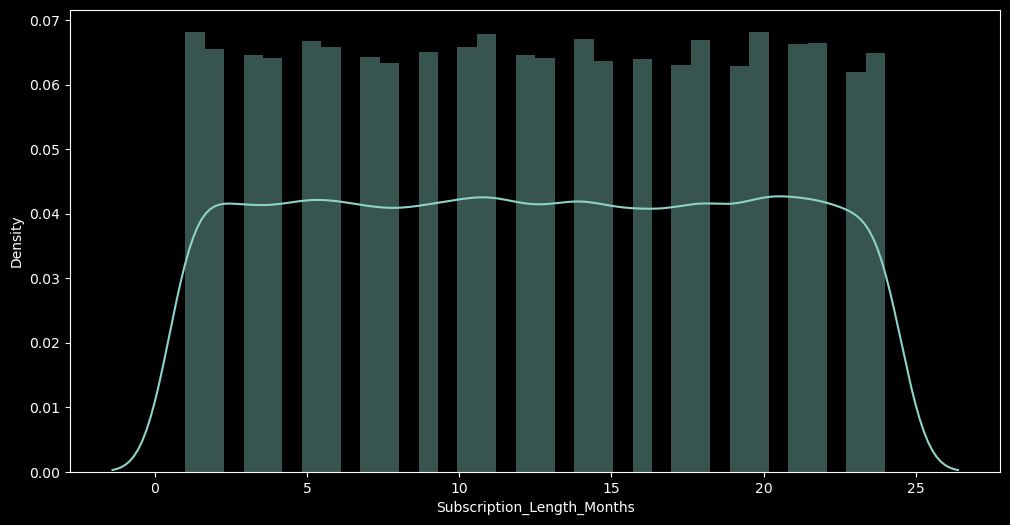

In [109]:
sns.distplot(df.Subscription_Length_Months)

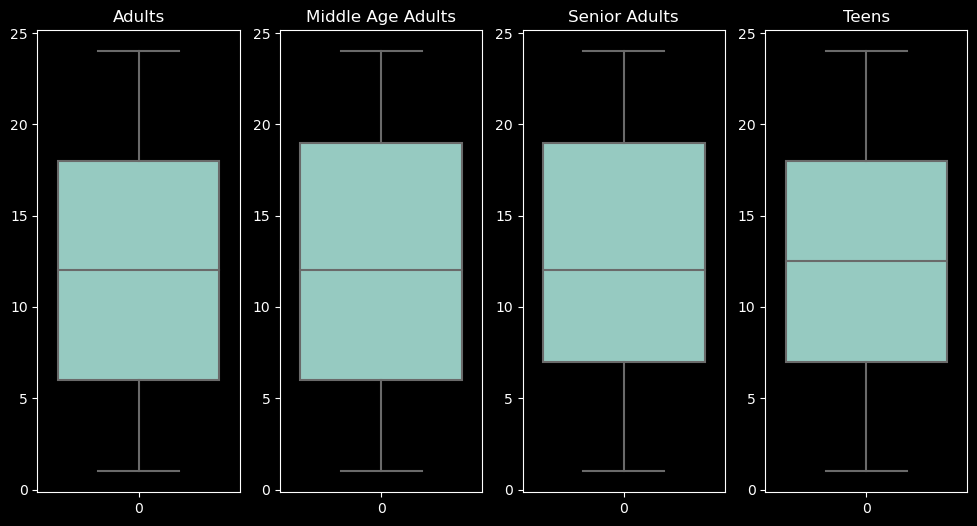

In [119]:
iterr = 1
for ind, rdf in df.groupby('Age_group'):
    plt.subplot(1, 4, iterr)
    rdf = rdf.reset_index(drop = True)
    plt.title(ind)
    sns.boxplot(rdf.Subscription_Length_Months)
    iterr += 1

In [129]:
import pickle

def save_pkl(data, name):
    if 'pickles' not in os.listdir():
        os.makedirs('pickles')
        
    if not name.endswith('.pkl'):
        name = f'{name}.pkl'
        
    name = os.path.join('pickles', name)
    with open(name, 'wb') as file:
        pickle.dump(data, file)
    file.close()
    print(f'Saved the data to {name}')
    
def load_pkl(name):
    name = os.path.join('pickles', name)
    with open(name, 'rb') as file:
         data = pickle.load(file) 
    file.close()
    return data

In [163]:
df = pd.read_excel(dfname)
df['Age_group'] = df.Age.apply(age_feature)
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_group
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,Senior Adults
1,2,Customer_2,62,Female,New York,1,48.76,172,0,Senior Adults
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,Adults
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,Adults
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,Middle Age Adults


In [164]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
Age_group                     0
dtype: int64

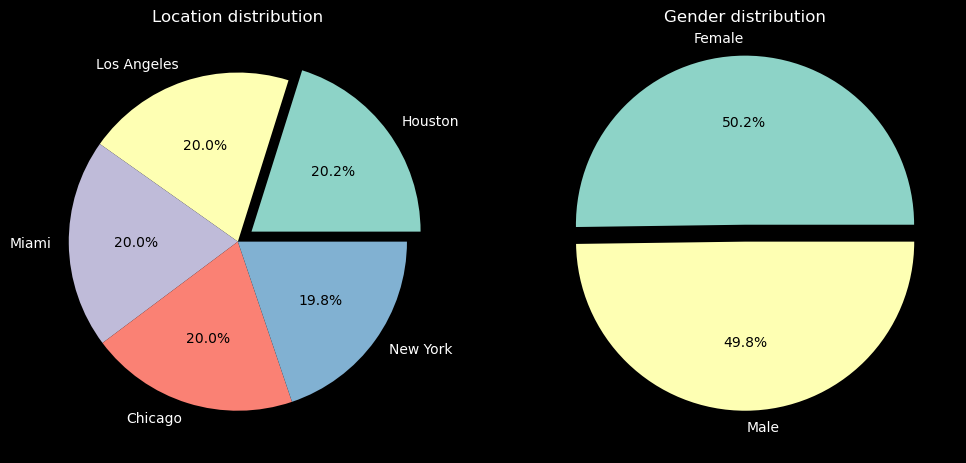

In [123]:
plt.subplot(1, 2, 1)
plt.title('Location distribution')
plot_pie(df.Location, nrows)

plt.subplot(1, 2, 2)
plt.title('Gender distribution')
plot_pie(df.Gender, nrows)

In [165]:
df.shape[0]

100000

#### whole population is similar to sample data distribution

In [167]:
_, gender_enc = encode_(df.Gender, True)
_, location_enc = encode_(df.Location, True)
_, age_group_enc = encode_(df.Age_group, True)

save_pkl(gender_enc, 'gender.pkl')
save_pkl(location_enc, 'location.pkl')
save_pkl(age_group_enc, 'age_group.pkl')

Saved the data to pickles\age_group.pkl


In [169]:
columns = df.columns[2:]
corr = df[columns]
corr['Age_group'] = age_group_enc.transform(corr.Age_group)
corr['Gender'] = gender_enc.transform(corr.Gender)
corr['Location'] = location_enc.transform(corr.Location)
corr.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_group
0,63,1,2,17,73.36,236,0,2
1,62,0,4,1,48.76,172,0,2
2,24,0,2,5,85.47,460,0,0
3,36,0,3,3,97.94,297,1,0
4,46,0,3,19,58.14,266,0,1


<Axes: >

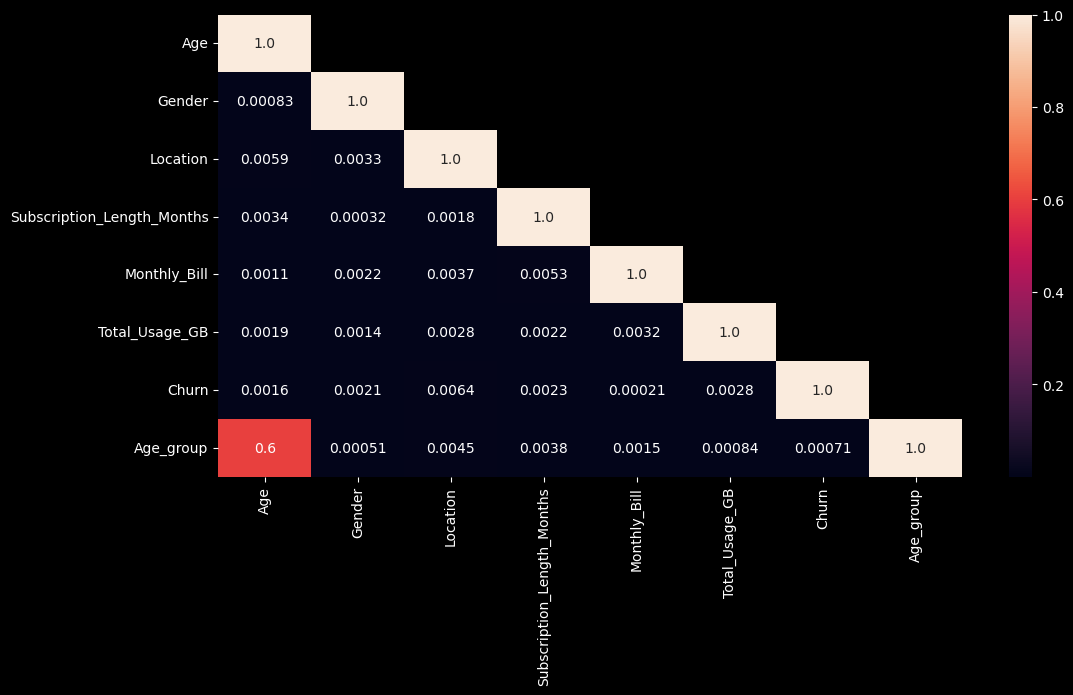

In [170]:
sns.heatmap(np.abs(corr.corr()).where(np.tril(np.ones(corr.corr().shape)).astype(np.bool_)), fmt = '.2', annot = True)

##### we have no multi-colinearity between any independent features except age and age group which is obvious because we created age_group from age 

> ###### Based on the visualization, there's a high possibility of this data synthetically generated because of how all the features are equally distributed 

> Since none of the independent variables are correlating with `Churn` feature, whatever classification model we use to train based on this dataset, none will produce good results due to high bias ( less interesting features )